In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [13]:
# Preparación de los datos
from sklearn import preprocessing

# Cargar los datos desde el archivo CSV
data = pd.read_csv("HOG_skimage.csv")

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop("etiqueta", axis=1)  # Características
y = data["etiqueta"]  # Etiquetas

In [14]:
# Escalar las características

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
import random

random_state = random.randint(0, 100)  # This will generate a random integer between 0 and 100

print(random_state)

56


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier

# Define tus parámetros
learning_rate = 0.20
momentum_descent = 0.40
hidden_layers = (38,)
# Crea el clasificador MLP
mlp_classifier = MLPClassifier(
                        max_iter = 1000,
                        activation = 'relu',
                        solver='adam',
                        tol = 0.000000001,  
                        hidden_layer_sizes = hidden_layers,
                        learning_rate_init = learning_rate,
                        momentum = momentum_descent,
                        random_state = 11,
                        )

from sklearn.model_selection import cross_validate 
for i in range(10, 20):
    scores = cross_validate(mlp_classifier, X_scaled, y, cv=i, return_train_score=True)
    # print("Puntuaciones de prueba: ", scores['test_score'])
    print(f"=>fold {i} media prueba: ", np.mean(scores['test_score']))
    # print("Puntuaciones de entrenamiento: ", scores['train_score'])
    # print(f"=> media entrenamiento: ", np.mean(scores['train_score']))
    print("------------------------")

=>fold 10 media prueba:  0.7726666666666667
------------------------
=>fold 11 media prueba:  0.7760229966112319
------------------------
=>fold 12 media prueba:  0.7730000000000001
------------------------
=>fold 13 media prueba:  0.7953423388205997
------------------------
=>fold 14 media prueba:  0.7806750085385165
------------------------
=>fold 15 media prueba:  0.78
------------------------
=>fold 16 media prueba:  0.7756961827284105
------------------------
=>fold 17 media prueba:  0.7790057856732832
------------------------
=>fold 18 media prueba:  0.7783288843998749
------------------------
=>fold 19 media prueba:  0.7860046593141728
------------------------


In [ ]:
import numpy as np
hyperparameters = []
for learning_rate in np.arange(0.2, 0.5, 0.1):
    for momentum_descent in np.arange(0.2, 0.5, 0.1):
        for neuronas in np.arange(2, 20):
            hyperparameters.append([learning_rate, momentum_descent, neuronas])

print(len(hyperparameters))

In [16]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define tus parámetros
learning_rate = 0.20
momentum_descent = 0.40
hidden_layers = (95)
# Crea el clasificador MLP
mlp = MLPClassifier(
                    max_iter = 1000,
                    activation = 'relu',
                    solver='adam',
                    random_state = 11,
                    tol = 1e-6,
                    
                    hidden_layer_sizes = hidden_layers,
                    learning_rate_init = learning_rate,
                    momentum = momentum_descent
                    )

# Entrenar el clasificador
mlp.fit(X_train_scaled, y_train)

# Obtener la exactitud del modelo en GENERAL
y_pred = mlp.predict(X_test_scaled) # Prediccion
print(accuracy_score(y_test, y_pred)) # Precision exacta

0.8033333333333333


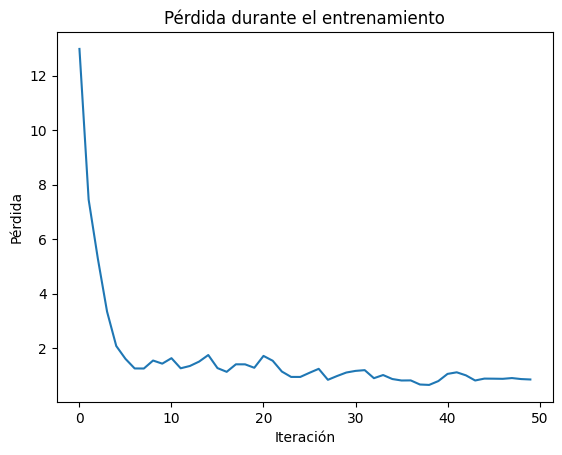

In [17]:
# Obtener la pérdida de cada iteración
loss_curve = mlp.loss_curve_

# Graficar la pérdida de cada iteración
plt.plot(loss_curve)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

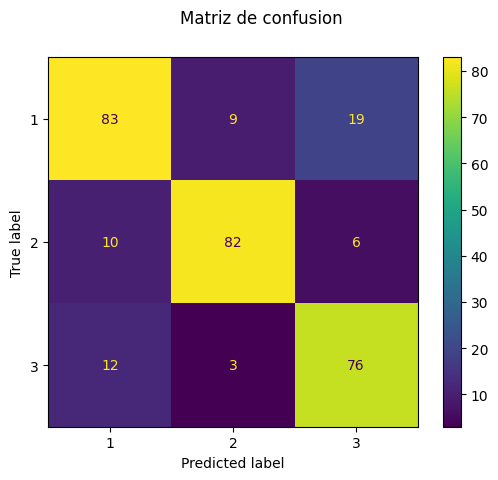

In [18]:
fig = ConfusionMatrixDisplay.from_estimator(mlp, X_test_scaled, y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Matriz de confusion")
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77       111
           2       0.87      0.84      0.85        98
           3       0.75      0.84      0.79        91

    accuracy                           0.80       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.81      0.80      0.80       300

